## 1. Getting Knowing The Data

### 1.1 Chipotle

In [1]:
import pandas as pd
chipo = pd.read_csv('chipotle.tsv', sep='\t')

In [2]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
chipo.shape

(4622, 5)

In [4]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [5]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

c1 = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).drop('order_id', axis=1)
c1.tail(10)

In [21]:
chipo.item_name.nunique()

50

In [23]:
c2 = chipo.groupby('choice_description').sum().sort_values('quantity', ascending=False).drop('order_id',axis=1)
c2.head()

,quantity
choice_description,
[Diet Coke],159
[Coke],143
[Sprite],89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",42


In [24]:
chipo.choice_description.nunique()

1043

In [32]:
c1.quantity.nsmallest(10)

item_name
Chips and Mild Fresh Tomato Salsa    1
Carnitas Salad                       1
Veggie Crispy Tacos                  1
Salad                                2
Crispy Tacos                         2
Bowl                                 4
Steak Salad                          4
Burrito                              6
Veggie Salad                         6
Carnitas Salad Bowl                  6
Name: quantity, dtype: int64

In [33]:
# how many items were ordered in total?
chipo.quantity.sum()

4972

In [36]:
chipo.item_price.dtype

dtype('O')

In [37]:
# create a lambda function to change the type of item price
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)
chipo.item_price.dtype

dtype('float64')

In [38]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [40]:
# total revenue
rev = (chipo.quantity * chipo.item_price).sum()
rev

39237.02

In [44]:
# how many orders were made?
total_orders = chipo.order_id.nunique()
total_orders

1834

In [50]:
# what is the average avenue per order?
print(rev/total_orders)
chipo['revenue'] = chipo.quantity * chipo.item_price
chipo.groupby('order_id').sum().drop('item_price', axis=1)['revenue'].mean()

21.39423118865867


21.39423118865867

In [51]:
# how many different items?
chipo.item_name.nunique()

50

### 1.2 Occupation

In [52]:
users = pd.read_csv('user.txt', sep='|', index_col='user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [53]:
users.shape

(943, 4)

In [54]:
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [55]:
users.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

In [56]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         943 non-null    int64 
 1   gender      943 non-null    object
 2   occupation  943 non-null    object
 3   zip_code    943 non-null    object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


In [57]:
users.occupation

user_id
1         technician
2              other
3             writer
4         technician
5              other
           ...      
939          student
940    administrator
941          student
942        librarian
943          student
Name: occupation, Length: 943, dtype: object

In [63]:
print(users.occupation.nunique())
users.occupation.value_counts().count()

21


21

In [66]:
users.occupation.value_counts(ascending=False)

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

In [67]:
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [68]:
users.describe(include='all')

,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


In [69]:
users.occupation.describe()

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object

In [70]:
users.age.mean()

34.05196182396607

In [72]:
users.age.value_counts(ascending=True)

73     1
10     1
66     1
7      1
11     1
      ..
27    35
28    36
22    37
25    38
30    39
Name: age, Length: 61, dtype: int64

### 1.3 World Food Facts

In [74]:
food = pd.read_csv('foodfacts.tsv', sep='\t')
food.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
food.shape

(356027, 163)

In [77]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


In [80]:
food.iloc[:, 104].dtype

dtype('float64')

In [81]:
food.index

RangeIndex(start=0, stop=356027, step=1)

In [82]:
food.product_name[18]

'Lotus Organic Brown Jasmine Rice'

## 2. Filtering and Sorting

### 2.1 Chipotle

In [89]:
chipo = pd.read_csv('chipotle.tsv', sep='\t')

In [90]:
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [93]:
chipo_filtered = chipo.drop_duplicates(['item_name', 'choice_description'])
chipo_filtered

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4602,1827,1,Barbacoa Burrito,[Tomatillo Green Chili Salsa],9.25
4607,1829,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, S...",11.75
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25


In [98]:
chipo[chipo.quantity > 1].tail(10) # item_price is the order total

,order_id,quantity,item_name,choice_description,item_price
4423,1764,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",22.5
4427,1764,2,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Sour ...",23.5
4435,1767,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Chees...",17.5
4489,1786,4,Chips and Guacamole,NaN,17.8
4490,1786,4,Canned Soft Drink,[Coke],5.0
4491,1786,4,Canned Soft Drink,[Sprite],5.0
4499,1789,2,Canned Soft Drink,[Coke],2.5
4560,1812,2,Canned Soft Drink,[Coke],2.5
4561,1813,2,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",17.5
4582,1822,2,Bottled Water,NaN,3.0


In [101]:
chipo.columns = ['order_id', 'quantity', 'item_name', 'choice_description', 'order_total']

In [103]:
chipo['item_price'] = chipo.order_total/chipo.quantity
chipo[chipo.quantity > 1].head()

,order_id,quantity,item_name,choice_description,order_total,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
18,9,2,Canned Soda,[Sprite],2.18,1.09
51,23,2,Canned Soda,[Mountain Dew],2.18,1.09
135,60,2,Chicken Salad Bowl,"[Tomatillo Green Chili Salsa, [Sour Cream, Che...",22.50,11.25
148,67,2,Steak Burrito,"[Tomatillo-Red Chili Salsa (Hot), [Rice, Chees...",17.98,8.99


In [115]:
chipo.drop_duplicates(['item_name', 'choice_description'])[chipo.item_price > 10].shape

(707, 6)

In [108]:
print(chipo.choice_description.nunique())
print(chipo.item_name.nunique())

1043
50


In [116]:
chipo.sort_values('item_name').head()

,order_id,quantity,item_name,choice_description,order_total,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98,6.49
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49,6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49,6.49


In [122]:
chipo[chipo.item_price == chipo.item_price.max()].sort_values('quantity', ascending=False).head()

,order_id,quantity,item_name,choice_description,order_total,item_price
281,123,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",23.78,11.89
613,253,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",23.78,11.89
2442,970,1,Barbacoa Salad Bowl,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.89,11.89
4239,1692,1,Carnitas Salad Bowl,"[Tomatillo Green Chili Salsa, [Black Beans, Ch...",11.89,11.89
3749,1499,1,Carnitas Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.89,11.89


In [123]:
chipo[chipo.item_name == 'Veggie Salad Bowl'].shape

(18, 6)

In [124]:
chipo[(chipo.item_name == 'Canned Soda') & (chipo.quantity > 1)].shape

(20, 6)

### 2.2 Euro12

In [128]:
euro12 = pd.read_csv('Euro.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [127]:
euro12.shape

(16, 35)

In [129]:
euro12.Team.nunique()

16

In [131]:
discipline = euro12.loc[:, ['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [133]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [134]:
euro12['Yellow Cards'].mean()

7.4375

In [138]:
euro12.Team[euro12.Goals > 6]

5     Germany
13      Spain
Name: Team, dtype: object

In [139]:
euro12.Team[euro12.Team.str.startswith('G')]

5    Germany
6     Greece
Name: Team, dtype: object

In [141]:
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [142]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [143]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [152]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

In [153]:
army = pd.DataFrame(raw_data)
army

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters,origin
0,Nighthawks,1st,523,5,1045,1,1,1,4,Arizona
1,Nighthawks,1st,52,42,957,5,2,0,24,California
2,Nighthawks,2nd,25,2,1099,62,3,1,31,Texas
3,Nighthawks,2nd,616,2,1400,26,3,1,2,Florida
4,Dragoons,1st,43,4,1592,73,2,0,3,Maine
5,Dragoons,1st,234,7,1006,37,1,1,4,Iowa
6,Dragoons,2nd,523,8,987,949,2,0,24,Alaska
7,Dragoons,2nd,62,3,849,48,3,1,31,Washington
8,Scouts,1st,62,4,973,48,2,0,2,Oregon
9,Scouts,1st,73,7,1005,435,1,0,3,Wyoming


In [154]:
army.set_index('origin', inplace=True)

In [155]:
army

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2


In [156]:
army.veterans

origin
Arizona         1
California      5
Texas          62
Florida        26
Maine          73
Iowa           37
Alaska        949
Washington     48
Oregon         48
Wyoming       435
Louisana       63
Georgia       345
Name: veterans, dtype: int64

In [157]:
army[['veterans', 'deaths']]

,veterans,deaths
origin,,
Arizona,1,523
California,5,52
Texas,62,25
Florida,26,616
Maine,73,43
Iowa,37,234
Alaska,949,523
Washington,48,62
Oregon,48,62


In [159]:
army.loc[['Maine', 'Alaska'], ['deaths', 'size', 'deserters']]

,deaths,size,deserters
origin,,,
Maine,43,1592,3
Alaska,523,987,24


In [161]:
army.iloc[2:7, 2:6]

,deaths,battles,size,veterans
origin,,,,
Texas,25,2,1099,62
Florida,616,2,1400,26
Maine,43,4,1592,73
Iowa,234,7,1006,37
Alaska,523,8,987,949


In [163]:
army.iloc[4:, :]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


In [165]:
army.iloc[:, 2:7]

,deaths,battles,size,veterans,readiness
origin,,,,,
Arizona,523,5,1045,1,1
California,52,42,957,5,2
Texas,25,2,1099,62,3
Florida,616,2,1400,26,3
Maine,43,4,1592,73,2
Iowa,234,7,1006,37,1
Alaska,523,8,987,949,2
Washington,62,3,849,48,3
Oregon,62,4,973,48,2


In [166]:
army.loc[army.deaths > 50, :]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3


In [167]:
army[(army.deaths < 50) | (army.deaths > 500)]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


In [172]:
army.loc[army.regiment != 'Dragoons', :]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


In [173]:
army.loc[['Arizona', 'Texas'], :]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31


In [180]:
print(army.loc['Arizona', :][2])
print(army.loc[:, 'deaths'].iloc[2])

523
25


## 3. Grouping

### 3.1 Alcohol Consumption

In [182]:
drinks = pd.read_csv('drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [190]:
drinks.groupby('continent').mean().sort_values('beer_servings', ascending=False).beer_servings

continent
EU    193.777778
SA    175.083333
OC     89.687500
AF     61.471698
AS     37.045455
Name: beer_servings, dtype: float64

In [187]:
drinks.groupby('continent').wine_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [188]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [191]:
drinks.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


In [194]:
drinks.spirit_servings.agg(['mean', 'min', 'max'])

mean     80.994819
min       0.000000
max     438.000000
Name: spirit_servings, dtype: float64

In [195]:
drinks.groupby('continent').spirit_servings.agg(['min', 'max', 'mean'])

,min,max,mean
continent,,,
AF,0,152,16.339623
AS,0,326,60.840909
EU,0,373,132.555556
OC,0,254,58.437500
SA,25,302,114.750000


### 3.2 Occupation

In [198]:
users = pd.read_csv('user.txt', sep='|', index_col='user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [199]:
users.groupby('occupation').mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [200]:
def gender_to_numeric(x):
    if x == 'M':
        return 1
    else:
        return 0

users['gender_num'] = users['gender'].apply(gender_to_numeric)

In [227]:
# find the male ratio per occupation
(users.groupby('occupation').gender_num.sum()/users.occupation.value_counts() * 100).sort_values(ascending=False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

In [217]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [243]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [314]:
gender_cnt = users.groupby('occupation').gender.value_counts()
gender_cnt

occupation     gender
administrator  M          43
               F          36
artist         M          15
               F          13
doctor         M           7
educator       M          69
               F          26
engineer       M          65
               F           2
entertainment  M          16
               F           2
executive      M          29
               F           3
healthcare     F          11
               M           5
homemaker      F           6
               M           1
lawyer         M          10
               F           2
librarian      F          29
               M          22
marketing      M          16
               F          10
none           M           5
               F           4
other          M          69
               F          36
programmer     M          60
               F           6
retired        M          13
               F           1
salesman       M           9
               F           3
scientist      M     

In [315]:
occp_cnt = users.occupation.value_counts()
occp_cnt

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

In [317]:
type(gender_cnt.div(occp_cnt, level='occupation') * 100)

pandas.core.series.Series

In [320]:
gender_cnt = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
gender_cnt

gender
occupation    gender        
administrator F           36
              M           43
artist        F           13
              M           15
doctor        M            7
educator      F           26
              M           69
engineer      F            2
              M           65
entertainment F            2
              M           16
executive     F            3
              M           29
healthcare    F           11
              M            5
homemaker     F            6
              M            1
lawyer        F            2
              M           10
librarian     F           29
              M           22
marketing     F           10
              M           16
none          F            4
              M            5
other         F           36
              M           69
programmer    F            6
              M           60
retired       F            1
              M           13
salesman      F            3
              M            9
scientist     F            3
              M           28
student       F           60
              M          136
technician    F            1
              M           26
writer        F           19
              M           26

In [321]:
occp_cnt = users.groupby('occupation').agg({'gender': 'count'})
occp_cnt

,gender
occupation,
administrator,79
artist,28
doctor,7
educator,95
engineer,67
entertainment,18
executive,32
healthcare,16
homemaker,7


In [322]:
gender_cnt.div(occp_cnt, level='occupation')

gender
occupation    gender          
administrator F       0.455696
              M       0.544304
artist        F       0.464286
              M       0.535714
doctor        M       1.000000
educator      F       0.273684
              M       0.726316
engineer      F       0.029851
              M       0.970149
entertainment F       0.111111
              M       0.888889
executive     F       0.093750
              M       0.906250
healthcare    F       0.687500
              M       0.312500
homemaker     F       0.857143
              M       0.142857
lawyer        F       0.166667
              M       0.833333
librarian     F       0.568627
              M       0.431373
marketing     F       0.384615
              M       0.615385
none          F       0.444444
              M       0.555556
other         F       0.342857
              M       0.657143
programmer    F       0.090909
              M       0.909091
retired       F       0.071429
              M       0.928571
salesman      F       0.250000
              M       0.750000
scientist     F       0.096774
              M       0.903226
student       F       0.306122
              M       0.693878
technician    F       0.037037
              M       0.962963
writer        F       0.422222
              M       0.577778

### 3.3 Regiment

In [327]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

In [329]:
regiment = pd.DataFrame(raw_data, columns = raw_data.keys())
regiment

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [330]:
regiment.groupby('regiment').mean().preTestScore

regiment
Dragoons      15.50
Nighthawks    15.25
Scouts         2.50
Name: preTestScore, dtype: float64

In [332]:
regiment.groupby('company').describe()

preTestScore                                                      \
               count       mean        std  min   25%   50%    75%   max   
company                                                                    
1st              6.0   6.666667   8.524475  2.0  3.00   3.5   4.00  24.0   
2nd              6.0  15.500000  14.652645  2.0  2.25  13.5  29.25  31.0   

        postTestScore                                                       
                count       mean        std   min    25%   50%   75%   max  
company                                                                     
1st               6.0  57.666667  27.485754  25.0  34.25  66.0  70.0  94.0  
2nd               6.0  67.000000  14.057027  57.0  58.25  62.0  68.0  94.0

In [334]:
regiment.groupby('company').preTestScore.mean()

company
1st     6.666667
2nd    15.500000
Name: preTestScore, dtype: float64

In [340]:
regiment.groupby(['regiment', 'company']).preTestScore.mean().unstack()

company,1st,2nd
regiment,,
Dragoons,3.5,27.5
Nighthawks,14.0,16.5
Scouts,2.5,2.5


In [341]:
regiment.groupby(['regiment', 'company']).mean()

preTestScore  postTestScore
regiment   company                             
Dragoons   1st               3.5           47.5
           2nd              27.5           75.5
Nighthawks 1st              14.0           59.5
           2nd              16.5           59.5
Scouts     1st               2.5           66.0
           2nd               2.5           66.0

In [344]:
regiment.groupby(['regiment', 'company']).size().unstack()

company,1st,2nd
regiment,,
Dragoons,2,2
Nighthawks,2,2
Scouts,2,2


In [346]:
for group_name, group_data in regiment.groupby('regiment'):
    print(group_name)
    print(group_data)

Dragoons
   regiment company    name  preTestScore  postTestScore
4  Dragoons     1st   Cooze             3             70
5  Dragoons     1st   Jacon             4             25
6  Dragoons     2nd  Ryaner            24             94
7  Dragoons     2nd    Sone            31             57
Nighthawks
     regiment company      name  preTestScore  postTestScore
0  Nighthawks     1st    Miller             4             25
1  Nighthawks     1st  Jacobson            24             94
2  Nighthawks     2nd       Ali            31             57
3  Nighthawks     2nd    Milner             2             62
Scouts
   regiment company   name  preTestScore  postTestScore
8    Scouts     1st  Sloan             2             62
9    Scouts     1st  Piger             3             70
10   Scouts     2nd  Riani             2             62
11   Scouts     2nd    Ali             3             70


## 4. Apply

### 4.1 Student Alcohol Consumption

In [353]:
df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [354]:
alcohol = df.loc[:, 'school':'guardian']
alcohol.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father


In [355]:
capitalizer = lambda x: x.capitalize()
alcohol.Fjob = alcohol.Fjob.apply(capitalizer)
alcohol.Mjob = alcohol.Mjob.apply(capitalizer)

In [356]:
alcohol.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father


In [358]:
def majority(x):
    if x > 17:
        return True
    else:
        return False
alcohol['legal_drinker'] = alcohol.age.apply(majority)
alcohol.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother,True
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father,False
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother,False
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother,False
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father,False


In [360]:
alcohol.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   school         395 non-null    object
 1   sex            395 non-null    object
 2   age            395 non-null    int64 
 3   address        395 non-null    object
 4   famsize        395 non-null    object
 5   Pstatus        395 non-null    object
 6   Medu           395 non-null    int64 
 7   Fedu           395 non-null    int64 
 8   Mjob           395 non-null    object
 9   Fjob           395 non-null    object
 10  reason         395 non-null    object
 11  guardian       395 non-null    object
 12  legal_drinker  395 non-null    bool  
dtypes: bool(1), int64(3), object(9)
memory usage: 37.5+ KB


In [364]:
def times10(x):
    if type(x) is int:
        return 10 * x
    return x

alcohol_tmp = alcohol.applymap(times10)
alcohol_tmp.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,180,U,GT3,A,40,40,At_home,Teacher,course,mother,True
1,GP,F,170,U,GT3,T,10,10,At_home,Other,course,father,False
2,GP,F,150,U,LE3,T,10,10,At_home,Other,other,mother,False
3,GP,F,150,U,GT3,T,40,20,Health,Services,home,mother,False
4,GP,F,160,U,GT3,T,30,30,Other,Other,home,father,False


### 4.2 US Crime Rates 1960 - 2014

In [380]:
crime = pd.read_csv('US_Crime_Rates_1960_2014.csv')
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [381]:
crime.shape

(55, 12)

In [382]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Total               55 non-null     int64
 3   Violent             55 non-null     int64
 4   Property            55 non-null     int64
 5   Murder              55 non-null     int64
 6   Forcible_Rape       55 non-null     int64
 7   Robbery             55 non-null     int64
 8   Aggravated_assault  55 non-null     int64
 9   Burglary            55 non-null     int64
 10  Larceny_Theft       55 non-null     int64
 11  Vehicle_Theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


In [383]:
crime.Year = pd.to_datetime(crime.Year, format='%Y')
crime.head(2)

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000


In [386]:
crime = crime.set_index('Year', drop=True)
crime.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [388]:
del crime['Total']
crime.head(2)

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000


In [391]:
crime_10y = crime.resample('10AS').sum()
crime_10y

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,1915053175,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,2121193298,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,2371370069,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,2612825258,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,2947969117,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,1570146307,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [393]:
Population = crime['Population'].resample('10AS').max()
crime_10y['Population'] = Population

In [394]:
crime_10y

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [401]:
crime.idxmax(0)

Population           2014-01-01
Violent              1992-01-01
Property             1991-01-01
Murder               1991-01-01
Forcible_Rape        1992-01-01
Robbery              1991-01-01
Aggravated_assault   1993-01-01
Burglary             1980-01-01
Larceny_Theft        1991-01-01
Vehicle_Theft        1991-01-01
dtype: datetime64[ns]

## 5. Merge

### 5.1 Auto MPG

In [402]:
cars1 = pd.read_csv('cars1.csv')
cars2 = pd.read_csv('cars2.csv')

In [403]:
print(cars1.shape)
print(cars2.shape)

(198, 14)
(200, 9)


In [404]:
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN


In [406]:
cars1 = cars1.loc[:, 'mpg':'car']

In [407]:
cars2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,33.0,4,91,53,1795,17.4,76,3,honda civic
1,20.0,6,225,100,3651,17.7,76,1,dodge aspen se
2,18.0,6,250,78,3574,21.0,76,1,ford granada ghia
3,18.5,6,250,110,3645,16.2,76,1,pontiac ventura sj
4,17.5,6,258,95,3193,17.8,76,1,amc pacer d/l


In [408]:
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino


In [409]:
cars = cars1.append(cars2)
cars.shape

(398, 9)

In [411]:
cars.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
196,44.0,4,97,52,2130,24.6,82,2,vw pickup
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage
198,28.0,4,120,79,2625,18.6,82,1,ford ranger
199,31.0,4,119,82,2720,19.4,82,1,chevy s-10


In [412]:
cars.reset_index(inplace=True)
cars

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
394,196,44.0,4,97,52,2130,24.6,82,2,vw pickup
395,197,32.0,4,135,84,2295,11.6,82,1,dodge rampage
396,198,28.0,4,120,79,2625,18.6,82,1,ford ranger


In [420]:
# create a column called owners, which is a random number series from 15000 to 73000
import numpy as np
cars['owners'] = np.random.randint(low=15000, high=73000, size=len(cars))
cars.head()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,owners
0,0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,70204
1,1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,16987
2,2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,37773
3,3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,40755
4,4,17.0,8,302,140,3449,10.5,70,1,ford torino,57763


In [421]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         398 non-null    int64  
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    int64  
 4   horsepower    398 non-null    object 
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model         398 non-null    int64  
 8   origin        398 non-null    int64  
 9   car           398 non-null    object 
 10  owners        398 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 34.3+ KB


In [415]:
cars.head()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302,140,3449,10.5,70,1,ford torino


### 5.2 Fictious Name

In [422]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

In [423]:
df1 = pd.DataFrame(raw_data_1, columns = raw_data_1.keys())
df2 = pd.DataFrame(raw_data_2, columns = raw_data_2.keys())
df3 = pd.DataFrame(raw_data_3, columns = raw_data_3.keys())

In [424]:
df1

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [425]:
df2

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [426]:
df3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [427]:
all_data = df1.append(df2)
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [429]:
all_data_col = pd.concat([df1, df2], axis=1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [433]:
# merge all_data and df3 along the subject_id value
pd.merge(df3, all_data, on='subject_id')

,subject_id,test_id,first_name,last_name
0,1,51,Alex,Anderson
1,2,15,Amy,Ackerman
2,3,15,Allen,Ali
3,4,61,Alice,Aoni
4,4,61,Billy,Bonder
5,5,16,Ayoung,Atiches
6,5,16,Brian,Black
7,7,14,Bryce,Brice
8,8,15,Betty,Btisan


In [434]:
pd.merge(df1, df2, on='subject_id')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [435]:
pd.merge(df1, df2, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


### 5.3 Housing Market

In [456]:
s1 = pd.Series(np.random.randint(low=1, high=5, size=100))
s2 = pd.Series(np.random.randint(low=1, high=4, size=100))
s3 = pd.Series(np.random.randint(low=10000, high=30001, size=100))
housemkt = pd.concat([s1, s2, s3], axis=1)
housemkt.head()

,0,1,2
0,2,1,10363
1,3,3,22599
2,4,2,14062
3,4,1,13267
4,2,1,16165


In [457]:
housemkt.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
housemkt.head()

,bedrs,bathrs,price_sqr_meter
0,2,1,10363
1,3,3,22599
2,4,2,14062
3,4,1,13267
4,2,1,16165


In [458]:
# create a one column dataframe with values of 3 data series
bigcolumn = pd.concat([s1, s2, s3], axis=0)
bigcolumn = bigcolumn.to_frame()
print(type(bigcolumn))
bigcolumn.tail()

<class 'pandas.core.frame.DataFrame'>


,0
95,25289
96,12035
97,14101
98,13008
99,22093


In [459]:
bigcolumn.reset_index(inplace=True)
bigcolumn.head()

,index,0
0,0,2
1,1,3
2,2,4
3,3,4
4,4,2


In [460]:
bigcolumn.tail()

,index,0
295,95,25289
296,96,12035
297,97,14101
298,98,13008
299,99,22093


## 6. Statistics

### 6.1 US Baby Names

In [461]:
baby_names = pd.read_csv('US_Baby_Names_right.csv')
baby_names.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [462]:
baby_names =baby_names.iloc[:, 2:]
baby_names.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


In [463]:
baby_names.shape

(1016395, 5)

In [470]:
baby_names['Year'] = pd.to_datetime(baby_names['Year'], format='%Y')
baby_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Name    1016395 non-null  object        
 1   Year    1016395 non-null  datetime64[ns]
 2   Gender  1016395 non-null  object        
 3   State   1016395 non-null  object        
 4   Count   1016395 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 38.8+ MB


In [471]:
baby_names['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

In [472]:
names = baby_names.groupby('Name').sum()
names.head()

,Count
Name,
Aaban,12
Aadan,23
Aadarsh,5
Aaden,3426
Aadhav,6


In [474]:
names.Count.sort_values(ascending=False)[:5]

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
Name: Count, dtype: int64

In [476]:
baby_names.Name.nunique()

17632

In [482]:
names.Count.sort_values(ascending=False).index[0]

'Jacob'

In [485]:
names.Count.idxmax(0)

'Jacob'

In [491]:
sum(names.Count == names.Count.min())

2578

In [495]:
names[names.Count == names.Count.median()]

,Count
Name,
Aishani,49
Alara,49
Alysse,49
Ameir,49
Anely,49
...,...
Sriram,49
Trinton,49
Vita,49


In [496]:
names.Count.std()

11006.06946789057

In [500]:
names.Count.describe()

count     17632.000000
mean       2008.932169
std       11006.069468
min           5.000000
25%          11.000000
50%          49.000000
75%         337.000000
max      242874.000000
Name: Count, dtype: float64

### 6.2 Winds Statistics

In [6]:
import datetime
wind = pd.read_csv('wind.txt', sep='\s+', parse_dates=[[0,1,2]])
wind.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [7]:
wind.tail()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79
6573,1978-12-31,20.33,17.41,27.29,9.59,12.08,10.13,19.25,11.63,11.58,11.38,12.08,22.08


In [8]:
# the year is 2061. need to be fixed
def fix_century(x):
    if x.year > 1980:
        year = x.year - 100
    else:
        year = x.year
    return datetime.date(year, x.month, x.day)

wind['Yr_Mo_Dy'] = wind['Yr_Mo_Dy'].apply(fix_century)
wind.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [9]:
wind['Yr_Mo_Dy'] = pd.to_datetime(wind['Yr_Mo_Dy'])
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Yr_Mo_Dy  6574 non-null   datetime64[ns]
 1   RPT       6568 non-null   float64       
 2   VAL       6571 non-null   float64       
 3   ROS       6572 non-null   float64       
 4   KIL       6569 non-null   float64       
 5   SHA       6572 non-null   float64       
 6   BIR       6574 non-null   float64       
 7   DUB       6571 non-null   float64       
 8   CLA       6572 non-null   float64       
 9   MUL       6571 non-null   float64       
 10  CLO       6573 non-null   float64       
 11  BEL       6574 non-null   float64       
 12  MAL       6570 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 667.8 KB


In [10]:
wind.set_index('Yr_Mo_Dy', inplace=True)
wind.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [11]:
wind.isna().sum().sum()

31

In [12]:
wind.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [13]:
wind.shape

(6574, 12)

In [14]:
wind.mean().mean()

10.227982360836924

In [15]:
wind.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [16]:
day_stats = pd.DataFrame()
day_stats['min'] = wind.min(axis=1)
day_stats['max'] = wind.max(axis=1)
day_stats['mean'] = wind.mean(axis=1)
day_stats['std'] = wind.std(axis=1)
day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [17]:
wind.loc[wind.index.month==1, :].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [18]:
wind.resample('A').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [19]:
wind.groupby(wind.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [20]:
wind.groupby(wind.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [21]:
wind.groupby(wind.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [22]:
wind.groupby(wind.index.to_period('W')).agg(['min', 'max', 'mean', 'std'])[1:]

RPT                                VAL         \
                         min    max       mean       std    min    max   
Yr_Mo_Dy                                                                 
1961-01-02/1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88   
1961-01-09/1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   
1961-01-16/1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   
1961-01-23/1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91   
1961-01-30/1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21   
...                      ...    ...        ...       ...    ...    ...   
1978-11-27/1978-12-03   9.08  21.29  14.934286  4.931754   4.54  21.34   
1978-12-04/1978-12-10   9.92  29.33  20.740000  7.215012  12.54  24.79   
1978-12-11/1978-12-17   9.87  23.13  16.758571  4.499431   3.21  24.04   
1978-12-18/1978-12-24   6.21  16.62  11.155714  3.522759   3.63  13.29   
1978-12-25/1978-12-31   7.21  20.33  14.951429  4.350400   5.46  17.41   

                                              ROS         ...        CLO  \
                            mean       std    min    max  ...       mean   
Yr_Mo_Dy                                                  ...              
1961-01-02/1961-01-08  11.486667  3.949525   7.62  12.33  ...   8.497143   
1961-01-09/1961-01-15   8.967143  3.148945   7.08  19.50  ...   7.571429   
1961-01-16/1961-01-22   9.862857  3.837785   7.29  20.79  ...   8.124286   
1961-01-23/1961-01-29  16.141429  5.170224  12.67  25.84  ...  15.640000   
1961-01-30/1961-02-05  15.460000  5.187395   9.04  19.70  ...   9.460000   
...                          ...       ...    ...    ...  ...        ...   
1978-11-27/1978-12-03  11.232857  5.978968   8.21  24.04  ...   9.547143   
1978-12-04/1978-12-10  19.190000  4.953060   7.21  25.37  ...  14.082857   
1978-12-11/1978-12-17  14.692857  7.578665   8.04  18.05  ...   8.565714   
1978-12-18/1978-12-24   8.008571  3.882900   8.50  22.21  ...   8.072857   
1978-12-25/1978-12-31  11.801429  4.705392   7.83  27.29  ...  11.471429   

                                   BEL                                MAL  \
                            std    min    max       mean       std    min   
Yr_Mo_Dy                                                                    
1961-01-02/1961-01-08  1.704941   5.46  17.54  12.481429  4.349139  10.88   
1961-01-09/1961-01-15  4.084293   5.25  20.71  11.125714  5.552215   5.17   
1961-01-16/1961-01-22  4.783952   6.50  15.92   9.821429  3.626584   6.79   
1961-01-23/1961-01-29  3.713368  14.04  27.71  20.930000  5.210726  17.50   
1961-01-30/1961-02-05  2.839501   9.17  19.33  14.012857  4.210858   7.17   
...                         ...    ...    ...        ...       ...    ...   
1978-11-27/1978-12-03  6.284973   4.92  21.42  11.835714  5.950112  11.50   
1978-12-04/1978-12-10  5.516405   9.54  26.08  18.517143  5.600389  15.34   
1978-12-11/1978-12-17  5.487801   5.00  21.50  11.102857  6.631925   6.92   
1978-12-18/1978-12-24  3.023131   3.21  19.79  11.845714  5.750301  10.29   
1978-12-25/1978-12-31  5.533397   1.21  21.79  12.947143  7.523148  11.96   

                                                    
                         max       mean        std  
Yr_Mo_Dy                                            
1961-01-02/1961-01-08  16.46  13.238571   1.773062  
1961-01-09/1961-01-15  16.92  11.024286   4.692355  
1961-01-16/1961-01-22  17.96  11.434286   4.237239  
1961-01-23/1961-01-29  27.63  22.530000   3.874721  
1961-01-30/1961-02-05  19.25  11.935714   4.336104  
...                      ...        ...        ...  
1978-11-27/1978-12-03  25.75  18.728571   6.393188  
1978-12-04/1978-12-10  34.59  23.061429   8.093976  
1978-12-11/1978-12-17  22.83  15.562857   6.005594  
1978-12-18/1978-12-24  31.71  18.977143   7.194108  
1978-12-25/1978-12-31  41.46  26.844286  11.621233  

[939 rows x 48 columns]

## 7.Visualization

### 7.1 Chipotle

In [73]:
import matplotlib.pyplot as plt

In [74]:
chipotle = pd.read_csv('chipotle.tsv', sep='\t')
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [75]:
dollarizer = lambda x: float(x[1:-1])
chipotle['item_price'] = chipotle['item_price'].apply(dollarizer)

In [76]:
chipotle.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75


In [77]:
x = pd.DataFrame(chipotle.item_name.value_counts(ascending=False)[:5])
x

,item_name
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301


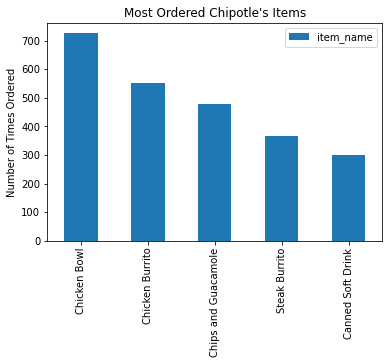

In [78]:
x.plot(kind='bar')
plt.ylabel('Number of Times Ordered')
plt.title('Most Ordered Chipotle\'s Items')
plt.show()

In [79]:
chipotle['order_total'] = chipotle['item_price']
chipotle.head(2)

,order_id,quantity,item_name,choice_description,item_price,order_total
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39


In [80]:
chipotle['item_price'] = chipotle['item_price']/chipotle['quantity']
chipotle.head(10)

,order_id,quantity,item_name,choice_description,item_price,order_total
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",8.49,16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
6,3,1,Side of Chips,NaN,1.69,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,9.25


In [81]:
chipotle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
 5   order_total         4622 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 216.8+ KB


In [95]:
y = chipotle.groupby('item_price').sum().iloc[:, 1:]
y.head(30)

,quantity,order_total
item_price,,
1.09,160,174.40
1.25,351,438.75
1.50,177,265.50
1.69,107,180.83
1.69,3,5.07
1.99,1,1.99
2.15,229,492.35
2.29,3,6.87
2.39,112,267.68


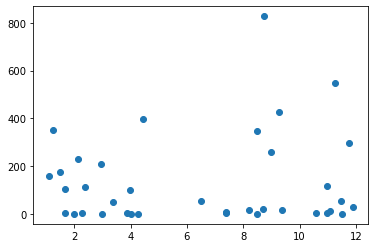

In [96]:
plt.scatter(y.index, y.quantity)
plt.show()

In [97]:
chipotle.describe(include='all')

,order_id,quantity,item_name,choice_description,item_price,order_total
count,4622.000000,4622.000000,4622,3376,4622.000000,4622.000000
unique,NaN,NaN,50,1043,NaN,NaN
top,NaN,NaN,Chicken Bowl,[Diet Coke],NaN,NaN
freq,NaN,NaN,726,134,NaN,NaN
mean,927.254868,1.075725,NaN,NaN,7.084424,7.464336
std,528.890796,0.410186,NaN,NaN,3.665487,4.245557
min,1.000000,1.000000,NaN,NaN,1.090000,1.090000
25%,477.250000,1.000000,NaN,NaN,2.950000,3.390000
50%,926.000000,1.000000,NaN,NaN,8.750000,8.750000
75%,1393.000000,1.000000,NaN,NaN,9.250000,9.250000


### 7.2 Online Retail

In [240]:
import seaborn as sns
sns.set(style='ticks')

In [241]:
online_retail = pd.read_csv('Online_Retail.csv', encoding='latin1')
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [242]:
countries_top10 = pd.DataFrame(online_retail.groupby('Country').sum().Quantity.sort_values(ascending=False)[1:11])
countries_top10

,Quantity
Country,
Netherlands,200128
EIRE,142637
Germany,117448
France,110480
Australia,83653
Sweden,35637
Switzerland,30325
Spain,26824
Japan,25218


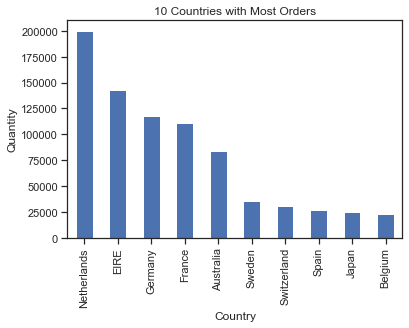

In [204]:
countries_top10.Quantity.plot(kind='bar')
plt.ylabel('Quantity')
plt.title('10 Countries with Most Orders')
plt.show()

In [205]:
online_retail.shape

(541909, 8)

In [243]:
online_retail = online_retail.loc[online_retail.Quantity > 0, :]
online_retail.shape

(531285, 8)

In [207]:
online_retail.describe()

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [244]:
online_retail = online_retail[online_retail.UnitPrice > 0]
online_retail.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [209]:
#online_retail = online_retail[online_retail.Country != 'United Kingdom']
y = online_retail.groupby(['CustomerID', 'Country']).sum().sort_values('Quantity', ascending=False)
y.head()

,,Quantity,UnitPrice
CustomerID,Country,,
14646.0,Netherlands,196915,5176.09
16446.0,United Kingdom,80997,4.98
14911.0,EIRE,80265,26185.72
12415.0,Australia,77374,2097.08
12346.0,United Kingdom,74215,1.04


In [210]:
countries_top3 = ['Netherlands', 'EIRE', 'Australia']

In [211]:
y['Country'] = y.index.get_level_values(1)
y.head()

,,Quantity,UnitPrice,Country
CustomerID,Country,,,
14646.0,Netherlands,196915,5176.09,Netherlands
16446.0,United Kingdom,80997,4.98,United Kingdom
14911.0,EIRE,80265,26185.72,EIRE
12415.0,Australia,77374,2097.08,Australia
12346.0,United Kingdom,74215,1.04,United Kingdom


In [212]:
y_sub = y[y['Country'].isin(countries_top3)]
y_sub

,,Quantity,UnitPrice,Country
CustomerID,Country,,,
14646.0,Netherlands,196915,5176.09,Netherlands
14911.0,EIRE,80265,26185.72,EIRE
12415.0,Australia,77374,2097.08,Australia
14156.0,EIRE,57885,5357.68,EIRE
12431.0,Australia,2431,705.57,Australia
14016.0,EIRE,2125,635.88,EIRE
12388.0,Australia,1462,277.77,Australia
12759.0,Netherlands,902,305.47,Netherlands
12775.0,Netherlands,877,256.12,Netherlands


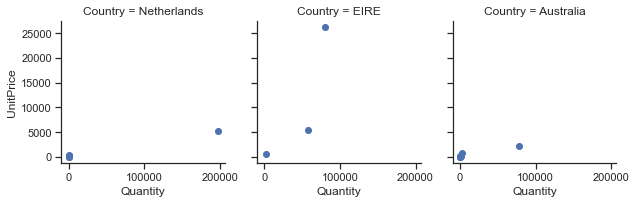

In [213]:
# create the FacetGrid
graph = sns.FacetGrid(y_sub, col='Country')
graph.map(plt.scatter, 'Quantity', 'UnitPrice')
plt.show()

In [214]:
online_retail.groupby('CustomerID').sum().sort_values('Quantity', ascending=False).head()

,Quantity,UnitPrice
CustomerID,,
14646.0,196915,5176.09
16446.0,80997,4.98
14911.0,80265,26185.72
12415.0,77374,2097.08
12346.0,74215,1.04


In [247]:
# In the above graph, the UnitPrice is misleading
online_retail['Revenue'] = online_retail['Quantity'] * online_retail['UnitPrice']
online_retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [216]:
online_retail = online_retail[online_retail.Country != 'United Kingdom']
online_retail.groupby(['CustomerID', 'Country']).Quantity.sum().sort_values(ascending=False).index

MultiIndex([(14646.0, 'Netherlands'),
            (14911.0,        'EIRE'),
            (12415.0,   'Australia'),
            (14156.0,        'EIRE'),
            (17404.0,      'Sweden'),
            (12753.0,       'Japan'),
            (12433.0,      'Norway'),
            (12678.0,      'France'),
            (12731.0,      'France'),
            (12471.0,     'Germany'),
            ...
            (12370.0,     'Austria'),
            (12814.0,      'Poland'),
            (12548.0,       'Spain'),
            (12531.0,     'Germany'),
            (12665.0,     'Germany'),
            (13809.0,      'Cyprus'),
            (12506.0,      'France'),
            (12353.0,     'Bahrain'),
            (12401.0,     'Belgium'),
            (12789.0, 'Netherlands')],
           names=['CustomerID', 'Country'], length=426)

In [226]:
z = online_retail[online_retail.Country.isin(countries_top3)].groupby(['CustomerID', 'Country']).sum()
z = z.drop('UnitPrice', axis=1)
z['Country'] = z.index.get_level_values(1)
z

,,Quantity,Revenue,Country
CustomerID,Country,,,
12386.0,Australia,354,401.90,Australia
12388.0,Australia,1462,2780.66,Australia
12393.0,Australia,816,1582.60,Australia
12415.0,Australia,77374,124914.53,Australia
12422.0,Australia,195,386.20,Australia
12424.0,Australia,740,1760.96,Australia
12431.0,Australia,2431,5514.67,Australia
12434.0,Australia,394,806.14,Australia
12759.0,Netherlands,902,1531.44,Netherlands


In [227]:
z['AvgPrice'] = z['Revenue']/z['Quantity']
z.head()

,,Quantity,Revenue,Country,AvgPrice
CustomerID,Country,,,,
12386.0,Australia,354,401.90,Australia,1.135311
12388.0,Australia,1462,2780.66,Australia,1.901956
12393.0,Australia,816,1582.60,Australia,1.939461
12415.0,Australia,77374,124914.53,Australia,1.614425
12422.0,Australia,195,386.20,Australia,1.980513


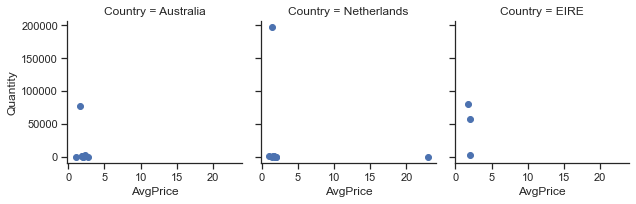

In [229]:
graph = sns.FacetGrid(z, col='Country')
graph.map(plt.scatter, 'AvgPrice', 'Quantity', alpha=1)
plt.show()

In [230]:
# plot the data for each CustomerID on a single graph
customers = online_retail.groupby('CustomerID').sum().drop('UnitPrice', axis=1)
customers.head()

,Quantity,Revenue
CustomerID,,
12347.0,2458,4310.00
12348.0,2341,1797.24
12349.0,631,1757.55
12350.0,197,334.40
12352.0,536,2506.04


In [232]:
customers['AvgPrice'] = customers['Revenue']/customers['Quantity']
customers.head(2)

,Quantity,Revenue,AvgPrice
CustomerID,,,
12347.0,2458,4310.00,1.753458
12348.0,2341,1797.24,0.767723


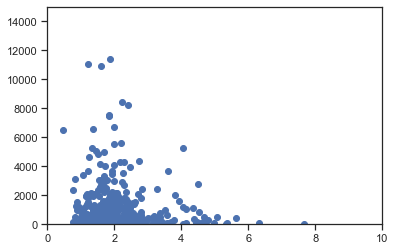

In [237]:
plt.scatter(customers.AvgPrice, customers.Quantity)
plt.ylim(0, 15000)
plt.xlim(0, 10)
plt.show()

In [234]:
customers.describe()

,Quantity,Revenue,AvgPrice
count,418.000000,418.000000,418.000000
mean,2179.598086,3834.967344,2.232313
std,11509.205319,17626.226186,1.583938
min,4.000000,51.560000,0.464549
25%,228.500000,460.522500,1.564392
50%,524.500000,1031.995000,1.908428
75%,1414.250000,2705.637500,2.411461
max,196915.000000,280206.020000,22.962500


In [248]:
# group UnitPrice by intervals of 1 for prices [0, 50), and sum Quantity and Revenue
import numpy as np
buckets = np.arange(0, 50, 1)
buckets

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [249]:
revenue_per_bucket = online_retail.groupby(pd.cut(online_retail.UnitPrice, buckets)).Revenue.sum()
revenue_per_bucket

UnitPrice
(0, 1]      1107774.544
(1, 2]      2691765.110
(2, 3]      2024143.090
(3, 4]       865101.780
(4, 5]      1219377.050
(5, 6]       391001.440
(6, 7]       268922.630
(7, 8]       306205.230
(8, 9]       380043.780
(9, 10]      163837.730
(10, 11]     238086.810
(11, 12]      25263.810
(12, 13]     201834.290
(13, 14]      10601.790
(14, 15]      74428.790
(15, 16]      21168.790
(16, 17]      83848.440
(17, 18]      36664.180
(18, 19]        728.190
(19, 20]      17771.430
(20, 21]      21066.670
(21, 22]       2990.410
(22, 23]         23.000
(23, 24]         23.530
(24, 25]      42633.490
(25, 26]      12006.290
(26, 27]        134.180
(27, 28]       8904.000
(28, 29]         28.660
(29, 30]       8258.540
(30, 31]          0.000
(31, 32]          0.000
(32, 33]       2942.410
(33, 34]       5186.970
(34, 35]       9399.530
(35, 36]       2870.200
(36, 37]        181.590
(37, 38]         74.960
(38, 39]         38.260
(39, 40]      20749.790
(40, 41]         80.920
(41, 4

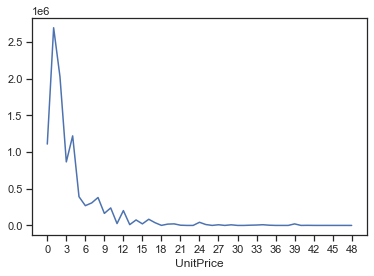

In [252]:
revenue_per_bucket.plot()
plt.xticks(np.arange(0, 50, 3), np.arange(0, 50, 3))
plt.show()

### 7.3 Scores

In [254]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
            'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
            'female': [0, 1, 1, 0, 1],
            'age': [42, 52, 36, 24, 73], 
            'preTestScore': [4, 24, 31, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70]}

df = pd.DataFrame(raw_data)

df

,first_name,last_name,female,age,preTestScore,postTestScore
0,Jason,Miller,0,42,4,25
1,Molly,Jacobson,1,52,24,94
2,Tina,Ali,1,36,31,57
3,Jake,Milner,0,24,2,62
4,Amy,Cooze,1,73,3,70


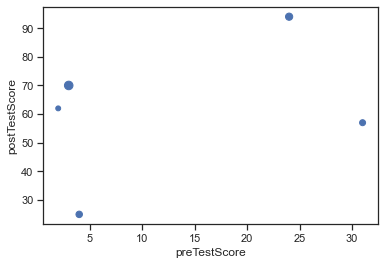

In [256]:
plt.scatter(df.preTestScore, df.postTestScore, s=df.age)
plt.xlabel('preTestScore')
plt.ylabel('postTestScore')
plt.show()

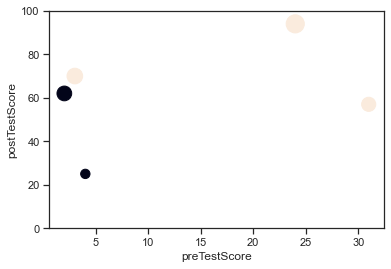

In [261]:
plt.scatter(df.preTestScore, df.postTestScore, s=df.postTestScore * 3.5, c=df.female)
plt.xlabel('preTestScore')
plt.ylabel('postTestScore')
plt.ylim(0, 100)
plt.show()

### 7.4 Tips

In [289]:
tips = pd.read_csv('tips.csv')
tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [290]:
tips = tips.iloc[:, 1:]
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


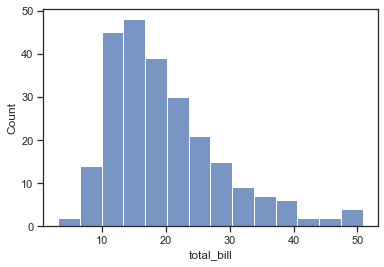

In [292]:
# plot the total_bill column histogram
sns.histplot(tips.total_bill)
plt.show()

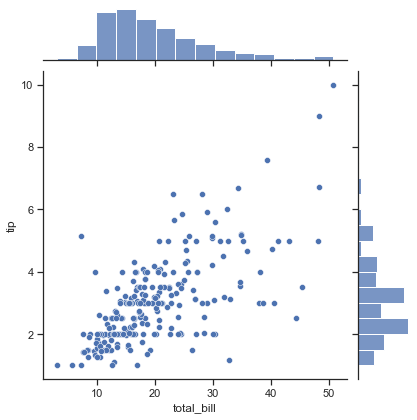

In [294]:
# scatter plot of the relationship between total_bill and tip
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

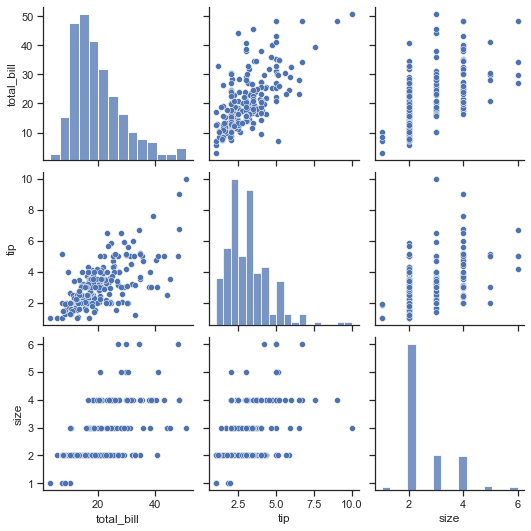

In [295]:
# realtionship of total_bill, tip, and size
sns.pairplot(tips)
plt.show()

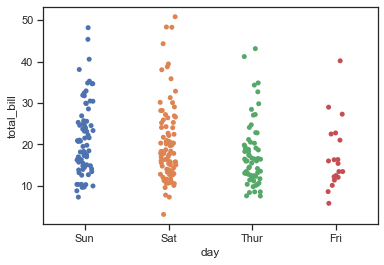

In [298]:
# relationship between days and total_bill
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)
plt.show()

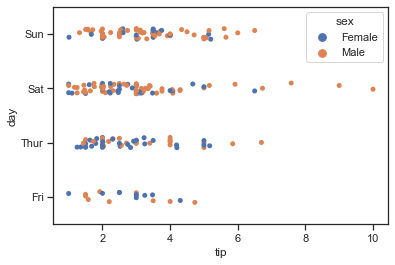

In [300]:
# relationship between tip and day, differ by sex
sns.stripplot(x='tip', y='day', data=tips, hue='sex')
plt.show()

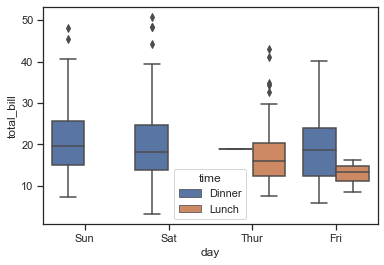

In [302]:
# boxplot of the relationship between total bill and day, differ by time
sns.boxplot(x='day', y='total_bill', data=tips, hue='time')
plt.show()

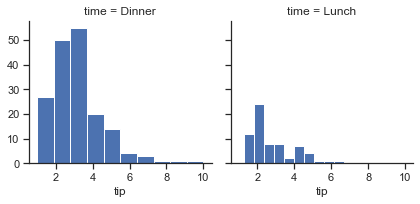

In [303]:
# two histograms of tip value based for lunch and dinner, side by side
g = sns.FacetGrid(tips, col='time')
g.map(plt.hist, 'tip')
plt.show()

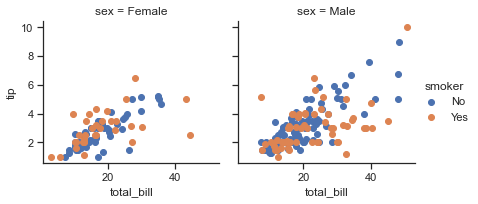

In [307]:
# two scatterplots for male and female, presenting total bill vs tip, differ by smoker or non-smoker
g = sns.FacetGrid(tips, col='sex', hue='smoker')
g.map(plt.scatter, 'total_bill', 'tip')
g.add_legend()
plt.show()

### 7.5 Titanic

In [308]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [309]:
titanic.set_index('PassengerId', inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


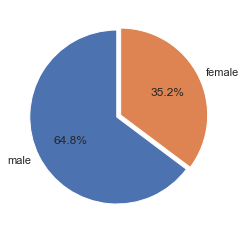

In [315]:
# create a pie chart representing the male/female proportion
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

proportions = [males, females]
plt.pie(proportions, labels=['male', 'female'], explode=(0.05, 0), autopct='%1.1f%%', startangle=90)
plt.show()

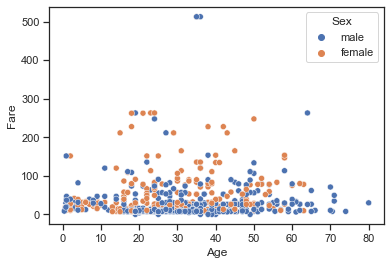

In [320]:
sns.scatterplot(x='Age', y='Fare', data=titanic, hue='Sex')
plt.show()

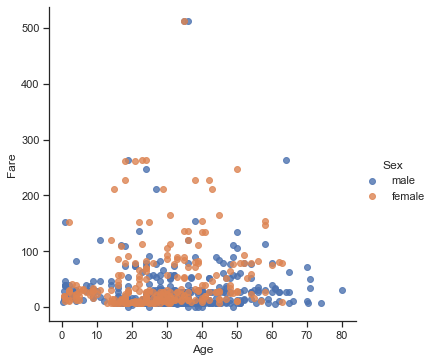

In [323]:
sns.lmplot(x='Age', y='Fare', data=titanic, hue='Sex', fit_reg=False)
plt.show()

## 8. Creating Series and Dataframes
### 8.2 Pokeman

In [3]:
import pandas as pd
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

In [4]:
pokeman = pd.DataFrame(raw_data)
pokeman

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


In [5]:
pokeman['place'] = ['park', 'street', 'lake', 'forest']
pokeman

,name,evolution,type,hp,pokedex,place
0,Bulbasaur,Ivysaur,grass,45,yes,park
1,Charmander,Charmeleon,fire,39,no,street
2,Squirtle,Wartortle,water,44,yes,lake
3,Caterpie,Metapod,bug,45,no,forest


## 9. Time Series
### 9.1 Apple Stock

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
apple = pd.read_csv('apple.csv')
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [8]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


In [10]:
apple.Date = pd.to_datetime(apple.Date)
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


In [11]:
apple.set_index('Date', inplace=True, drop=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [15]:
apple.index.is_unique

True

In [16]:
apple = apple.sort_values('Date', ascending=True)
apple.head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-19,28.25,28.38,28.25,28.25,12157600,0.44
1980-12-22,29.63,29.75,29.63,29.63,9340800,0.46
1980-12-23,30.88,31.00,30.88,30.88,11737600,0.48
1980-12-24,32.50,32.63,32.50,32.50,12000800,0.51


In [19]:
apple_month = apple.resample('BM').mean()
apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


In [21]:
apple.index.max() - apple.index.min()

Timedelta('12261 days 00:00:00')

In [23]:
len(apple_month)

404

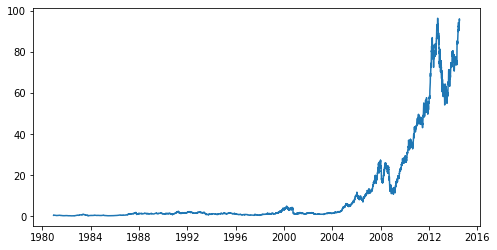

In [29]:
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(apple['Adj Close'])
plt.show()

### 9.2 Investor Flow of Funds in US

In [33]:
df = pd.read_csv('weekly.csv')
df.head()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
1,2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2,2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
3,2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
4,2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


In [35]:
print(df.info())
df['Date'] = pd.to_datetime(df['Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             44 non-null     object
 1   Total Equity     44 non-null     int64 
 2   Domestic Equity  44 non-null     int64 
 3   World Equity     44 non-null     int64 
 4   Hybrid           44 non-null     int64 
 5   Total Bond       44 non-null     int64 
 6   Taxable Bond     44 non-null     int64 
 7   Municipal Bond   44 non-null     int64 
 8   Total            44 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 3.2+ KB
None


In [36]:
df.set_index('Date', inplace=True, drop=True)
df.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


In [38]:
df.index

DatetimeIndex(['2012-12-05', '2012-12-12', '2012-12-19', '2012-12-26',
               '2013-01-02', '2013-01-09', '2014-04-02', '2014-04-09',
               '2014-04-16', '2014-04-23', '2014-04-30', '2014-05-07',
               '2014-05-14', '2014-05-21', '2014-05-28', '2014-06-04',
               '2014-06-11', '2014-06-18', '2014-06-25', '2014-07-02',
               '2014-07-09', '2014-07-30', '2014-08-06', '2014-08-13',
               '2014-08-20', '2014-08-27', '2014-09-03', '2014-09-10',
               '2014-11-05', '2014-11-12', '2014-11-19', '2014-11-25',
               '2015-01-07', '2015-01-14', '2015-01-21', '2015-01-28',
               '2015-02-04', '2015-02-11', '2015-03-04', '2015-03-11',
               '2015-03-18', '2015-03-25', '2015-04-01', '2015-04-08'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [39]:
monthly = df.resample('M').sum()
monthly.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-01-31,3661,-1627,5288,2730,12149,9414,2735,18540
2013-02-28,0,0,0,0,0,0,0,0
2013-03-31,0,0,0,0,0,0,0,0
2013-04-30,0,0,0,0,0,0,0,0


In [43]:
monthly = monthly[monthly['Total'] > 0]

In [44]:
monthly.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2013-01-31,3661,-1627,5288,2730,12149,9414,2735,18540
2014-04-30,10842,1048,9794,4931,8493,7193,1300,24267
2014-05-31,-2203,-8720,6518,3172,13767,10192,3576,14736
2014-06-30,2319,-6546,8865,4588,9715,7551,2163,16621
2014-07-31,-7051,-11128,4078,2666,7506,7026,481,3122


In [46]:
yearly = df.resample('Y').sum()
yearly.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-12-31,3661,-1627,5288,2730,12149,9414,2735,18540
2014-12-31,330,-44689,45021,19570,59890,44994,14896,79787
2015-12-31,15049,-10459,25508,7280,26028,17986,8041,48357


## 10.Deleting
### 10.1 Iris

In [162]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(url, names=col_names)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [163]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [164]:
iris.iloc[9:30, 2:3] = np.nan
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,NaN,0.1,Iris-setosa


In [165]:
iris.petal_length = iris.petal_length.interpolate()

In [166]:
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.400000,0.2,Iris-setosa
1,4.9,3.0,1.400000,0.2,Iris-setosa
2,4.7,3.2,1.300000,0.2,Iris-setosa
3,4.6,3.1,1.500000,0.2,Iris-setosa
4,5.0,3.6,1.400000,0.2,Iris-setosa
5,5.4,3.9,1.700000,0.4,Iris-setosa
6,4.6,3.4,1.400000,0.3,Iris-setosa
7,5.0,3.4,1.500000,0.2,Iris-setosa
8,4.4,2.9,1.400000,0.2,Iris-setosa
9,4.9,3.1,1.409091,0.1,Iris-setosa


In [167]:
del iris['class']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [168]:
iris.iloc[:3, :] = np.nan
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [169]:
iris = iris.dropna(how='any')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2


In [170]:
iris.reset_index(inplace=True, drop=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.6,3.1,1.5,0.2
1,5.0,3.6,1.4,0.2
2,5.4,3.9,1.7,0.4
3,4.6,3.4,1.4,0.3
4,5.0,3.4,1.5,0.2


### 10.2 Wine

In [171]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(url)
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [172]:
wine = wine.drop(wine.columns[[0, 3, 6, 8, 10, 12, 13]], axis=1)
wine.head()

,14.23,1.71,15.6,127,3.06,2.29,1.04
0,13.20,1.78,11.2,100,2.76,1.28,1.05
1,13.16,2.36,18.6,101,3.24,2.81,1.03
2,14.37,1.95,16.8,113,3.49,2.18,0.86
3,13.24,2.59,21.0,118,2.69,1.82,1.04
4,14.20,1.76,15.2,112,3.39,1.97,1.05


In [173]:
wine.columns = ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'hue']
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,13.20,1.78,11.2,100,2.76,1.28,1.05
1,13.16,2.36,18.6,101,3.24,2.81,1.03
2,14.37,1.95,16.8,113,3.49,2.18,0.86
3,13.24,2.59,21.0,118,2.69,1.82,1.04
4,14.20,1.76,15.2,112,3.39,1.97,1.05
...,...,...,...,...,...,...,...
172,13.71,5.65,20.5,95,0.61,1.06,0.64
173,13.40,3.91,23.0,102,0.75,1.41,0.70
174,13.27,4.28,20.0,120,0.69,1.35,0.59
175,13.17,2.59,20.0,120,0.68,1.46,0.60


In [174]:
wine.iloc[:3, 0] = np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100,2.76,1.28,1.05
1,NaN,2.36,18.6,101,3.24,2.81,1.03
2,NaN,1.95,16.8,113,3.49,2.18,0.86
3,13.24,2.59,21.0,118,2.69,1.82,1.04
4,14.20,1.76,15.2,112,3.39,1.97,1.05


In [175]:
wine.iloc[2:4, 3] = np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100.0,2.76,1.28,1.05
1,NaN,2.36,18.6,101.0,3.24,2.81,1.03
2,NaN,1.95,16.8,NaN,3.49,2.18,0.86
3,13.24,2.59,21.0,NaN,2.69,1.82,1.04
4,14.20,1.76,15.2,112.0,3.39,1.97,1.05


In [176]:
wine.alcohol = wine.alcohol.fillna(10)
wine.magnesium = wine.magnesium.fillna(100)
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.78,11.2,100.0,2.76,1.28,1.05
1,10.00,2.36,18.6,101.0,3.24,2.81,1.03
2,10.00,1.95,16.8,100.0,3.49,2.18,0.86
3,13.24,2.59,21.0,100.0,2.69,1.82,1.04
4,14.20,1.76,15.2,112.0,3.39,1.97,1.05


In [177]:
wine.isna().sum()

alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

In [178]:
random = np.random.randint(0, 10, 10)
random

array([3, 2, 5, 0, 3, 6, 2, 4, 0, 6])

In [179]:
wine.alcohol[random] = np.nan
wine.head(10)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100.0,2.76,1.28,1.05
1,10.00,2.36,18.6,101.0,3.24,2.81,1.03
2,NaN,1.95,16.8,100.0,3.49,2.18,0.86
3,NaN,2.59,21.0,100.0,2.69,1.82,1.04
4,NaN,1.76,15.2,112.0,3.39,1.97,1.05
5,NaN,1.87,14.6,96.0,2.52,1.98,1.02
6,NaN,2.15,17.6,121.0,2.51,1.25,1.06
7,14.83,1.64,14.0,97.0,2.98,1.98,1.08
8,13.86,1.35,16.0,98.0,3.15,1.85,1.01
9,14.10,2.16,18.0,105.0,3.32,2.38,1.25


In [180]:
wine.isna().sum()

alcohol              6
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

In [181]:
wine = wine.dropna(how='any')
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
1,10.00,2.36,18.6,101.0,3.24,2.81,1.03
7,14.83,1.64,14.0,97.0,2.98,1.98,1.08
8,13.86,1.35,16.0,98.0,3.15,1.85,1.01
9,14.10,2.16,18.0,105.0,3.32,2.38,1.25
10,14.12,1.48,16.8,95.0,2.43,1.57,1.17


In [182]:
wine.alcohol.notnull().sum()

171

In [183]:
wine = wine.reset_index(drop=True)

In [184]:
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,2.36,18.6,101.0,3.24,2.81,1.03
1,14.83,1.64,14.0,97.0,2.98,1.98,1.08
2,13.86,1.35,16.0,98.0,3.15,1.85,1.01
3,14.10,2.16,18.0,105.0,3.32,2.38,1.25
4,14.12,1.48,16.8,95.0,2.43,1.57,1.17
